<a href="https://colab.research.google.com/github/Osiroski/fantasyfootball/blob/main/FPL_webscraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
import numpy as np
import pandas as pd
import datetime

In [ ]:
# Make a get request to get the latest player data from the FPL API
link = "https://fantasy.premierleague.com/api/bootstrap-static/"
response = requests.get(link)

In [ ]:
#Use the requests package to make a GET request from the API endpoint:
#Then, transform that request into a json object:
r = requests.get(link)
json=r.json()

In [ ]:
#Checkout the keys
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [ ]:
#The three keys interested are elements , element_type , and teams .
#Build dataframes
elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [ ]:
elements_df.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [ ]:
elements_df.head()

,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,element_type,ep_next,ep_this,event_points,first_name,form,id,in_dreamteam,news,news_added,now_cost,photo,points_per_game,second_name,selected_by_percent,special,squad_number,status,team,team_code,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,minutes,goals_scored,assists,clean_sheets,goals_conceded,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,saves,bonus,bps,influence,creativity,threat,ict_index,influence_rank,influence_rank_type,creativity_rank,creativity_rank_type,threat_rank,threat_rank_type,ict_index_rank,ict_index_rank_type,corners_and_indirect_freekicks_order,corners_and_indirect_freekicks_text,direct_freekicks_order,direct_freekicks_text,penalties_order,penalties_text
0,0.0,0.0,37605,0,0,-3,3,0,3,0.0,0.0,0,Mesut,0.0,1,False,Not included in Arsenal's 25-man Premier Leagu...,2020-10-20T22:30:18.118477Z,67,37605.jpg,0.0,Özil,0.5,False,None,u,1,3,0,3441,0,53759,88,0.0,0.0,Özil,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,645,260,645,260,644,260,645,260,NaN,,NaN,,NaN,
1,0.0,0.0,39476,0,0,-2,2,0,2,0.0,0.0,0,Sokratis,0.0,2,False,Left the club by mutual consent on 20/1,2020-10-21T10:30:18.546407Z,48,39476.jpg,0.0,Papastathopoulos,0.1,False,None,u,1,3,0,10266,0,18968,16,0.0,0.0,Sokratis,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,603,219,593,219,584,215,606,219,NaN,,NaN,,NaN,
2,100.0,100.0,41270,0,0,-1,1,0,2,3.2,3.7,2,David,3.2,3,False,,2020-12-26T18:00:15.638627Z,54,41270.jpg,2.0,Luiz Moreira Marinho,0.8,False,None,a,1,3,22,44415,762,93953,905,0.6,4.1,David Luiz,749,0,0,2,10,0,0,0,1,0,0,0,117,119.0,29.6,56.0,20.4,261,100,315,103,258,79,304,99,NaN,,4.0,,NaN,
3,50.0,0.0,54694,0,0,-7,7,1,3,2.6,0.0,0,Pierre-Emerick,5.2,4,False,Personal Reasons - 50% chance of playing,2021-01-23T16:00:22.555453Z,113,54694.jpg,4.2,Aubameyang,6.7,False,None,d,1,3,71,560919,1056,3245828,21046,0.5,6.3,Aubameyang,1514,5,1,7,16,1,0,0,2,0,0,6,202,272.2,226.3,519.0,101.8,126,46,76,55,22,13,35,22,NaN,,NaN,,1.0,
4,100.0,100.0,58822,0,0,-4,4,0,2,3.5,4.0,2,Cédric,3.5,5,False,,2020-09-23T09:00:14.881983Z,46,58822.jpg,5.0,Soares,0.2,False,None,a,1,3,15,8697,1925,36592,632,0.8,3.3,Cédric,185,0,1,1,1,0,0,0,0,0,0,3,53,45.0,54.9,9.0,10.9,355,138,250,63,374,140,357,131,NaN,,NaN,,NaN,


In [ ]:

#Prepend **slim_** to these smaller, lighter dataframe copies:
slim_elements_df = elements_df[['web_name','team',
                                 'element_type','selected_by_percent','now_cost',
                                 'value_season',
                                 'total_points','points_per_game','minutes',
                                 'goals_scored','assists','yellow_cards',
                                 'red_cards','bonus','influence','creativity','threat'
                                 ]]

In [ ]:
slim_elements_df.head()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,points_per_game,minutes,goals_scored,assists,yellow_cards,red_cards,bonus,influence,creativity,threat
0,Özil,1,3,0.5,67,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0
1,Sokratis,1,2,0.1,48,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0
2,David Luiz,1,2,0.8,54,4.1,22,2.0,749,0,0,1,0,0,119.0,29.6,56.0
3,Aubameyang,1,3,6.7,113,6.3,71,4.2,1514,5,1,2,0,6,272.2,226.3,519.0
4,Cédric,1,2,0.2,46,3.3,15,5.0,185,0,1,0,0,3,45.0,54.9,9.0


In [ ]:
# V-lookup map the position name from the elements_type_df to the slim_elements_df .
#Add the column position

slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#Position column will come in handy when we organize value_season by position.
slim_elements_df.head()

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,points_per_game,minutes,goals_scored,assists,yellow_cards,red_cards,bonus,influence,creativity,threat,position
0,Özil,1,3,0.5,67,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,Midfielder
1,Sokratis,1,2,0.1,48,0.0,0,0.0,0,0,0,0,0,0,0.0,0.0,0.0,Defender
2,David Luiz,1,2,0.8,54,4.1,22,2.0,749,0,0,1,0,0,119.0,29.6,56.0,Defender
3,Aubameyang,1,3,6.7,113,6.3,71,4.2,1514,5,1,2,0,6,272.2,226.3,519.0,Midfielder
4,Cédric,1,2,0.2,46,3.3,15,5.0,185,0,1,0,0,3,45.0,54.9,9.0,Defender


In [ ]:
#mapping “name” from our teams_df:
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#Next, let’s sort this table by value_season to look at the top value picks this year.
#Convert values to integers
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


#** value = points / cost ![alt text](https://www.investopedia.com/thmb/IrfWjCyQXQ-7zM8jqgWu59y2jQI=/1200x675/smart/filters:no_upscale()/value1-d760aa25452542fa8d6a9f56ce165e29.jpg)

In [ ]:
#Sort_values() allows you to, well, sort values:
slim_elements_df.sort_values('value',ascending=False).head(10)

,web_name,team,element_type,selected_by_percent,now_cost,value_season,total_points,points_per_game,minutes,goals_scored,assists,yellow_cards,red_cards,bonus,influence,creativity,threat,position,value
35,Martínez,Aston Villa,1,32.8,51,18.2,93,5.2,1620,0,0,0,0,10,481.8,20.0,0.0,Goalkeeper,18.2
597,Soucek,West Ham,3,18.4,53,18.1,96,4.8,1800,7,1,2,0,13,494.6,109.6,586.0,Midfielder,18.1
119,Pope,Burnley,1,11.0,54,17.6,95,5.3,1620,0,0,0,0,17,547.0,10.0,0.0,Goalkeeper,17.6
584,Cresswell,West Ham,2,19.9,55,16.7,92,4.6,1800,0,7,0,0,11,399.0,485.3,51.0,Defender,16.7
50,Targett,Aston Villa,2,6.4,47,16.6,78,4.3,1604,0,3,4,0,5,290.0,225.1,80.0,Defender,16.6
495,Bednarek,Southampton,2,12.6,49,16.5,81,4.3,1620,1,1,1,0,11,393.2,42.7,95.0,Defender,16.5
7,Leno,Arsenal,1,9.1,50,16.4,82,4.1,1800,0,0,0,0,6,411.0,0.0,0.0,Goalkeeper,16.4
483,McCarthy,Southampton,1,18.9,46,15.9,73,4.1,1620,0,0,1,0,7,417.6,0.0,0.0,Goalkeeper,15.9
295,Bamford,Leeds,4,47.3,66,15.8,104,5.5,1605,10,5,1,0,13,433.8,124.9,878.0,Forward,15.8
580,Fabianski,West Ham,1,3.9,51,15.7,80,4.2,1710,0,0,1,0,9,398.4,0.0,0.0,Goalkeeper,15.7


In [ ]:
#Create a pivot_table on the column position , and look at value-by-position:
slim_elements_df.pivot_table(index='position',values='value',aggfunc=np.mean).reset_index()

,position,value
0,Defender,4.773128
1,Forward,4.172619
2,Goalkeeper,3.912162
3,Midfielder,4.528846


In [ ]:
slim_elements_df.columns

Index(['web_name', 'team', 'element_type', 'selected_by_percent', 'now_cost',
       'value_season', 'total_points', 'points_per_game', 'minutes',
       'goals_scored', 'assists', 'yellow_cards', 'red_cards', 'bonus',
       'influence', 'creativity', 'threat', 'position', 'value'],
      dtype='object')

In [ ]:
import seaborn as sns

In [ ]:
correlation = slim_elements_df.corr(method='pearson')
columns = correlation.nlargest(10, 'total_points').index
columns

Index(['total_points', 'value', 'minutes', 'bonus', 'goals_scored', 'assists',
       'now_cost', 'yellow_cards', 'element_type', 'red_cards'],
      dtype='object')

# Feature Correlate

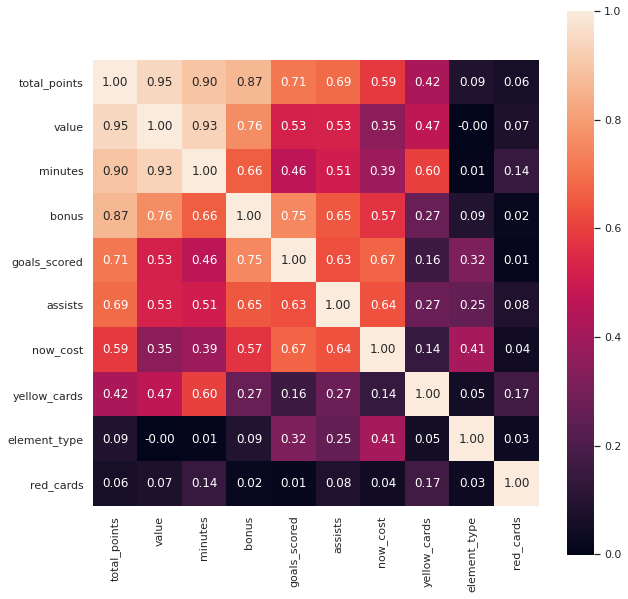

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
correlation_map = np.corrcoef(slim_elements_df[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

In [ ]:
X = slim_elements_df[columns]
Y = X['total_points'].values
X = X.drop('total_points', axis = 1).values

# Baseline algorithm test

There are a few regression algorithms I can use. I prefer to line the usable regression algorithms up and run them using a standard set of data. I check the negative mean square error of each run. The given data set is broken down into training set and testing set.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledXGB', Pipeline([('Scaler', StandardScaler()),('XGB', xgb.XGBRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10,shuffle=True, random_state=21)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -10.150202 (3.826452)
ScaledLASSO: -14.409484 (6.204086)
ScaledEN: -38.861505 (10.046372)
ScaledKNN: -44.530101 (13.840609)
ScaledCART: -28.030538 (16.024061)
ScaledGBM: -10.366386 (7.188784)
[17:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:10:44] WARNING: /workspace/src/o

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(X_train, Y_train)


predictions = model.predict(X_test)
print (mean_squared_error(Y_test, predictions))
# importing the LinearRegression class from linear_model submodule of scikit learn



# Importing cross_val_score function from the model_selection submodule of scikit learn



[17:10:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
13.407925087017173


In [ ]:
compare = pd.DataFrame({'Prediction': predictions, 'Test Data' : Y_test})
compare.head(10)

,Prediction,Test Data
0,31.350119,32
1,53.233246,54
2,3.023939,3
3,39.713821,39
4,18.003517,16
5,0.127016,0
6,15.655908,16
7,38.071335,38
8,12.251307,11
9,-0.042660,0


In [ ]:
pip install pulp

     |████████████████████████████████| 40.6MB 107kB/s 


# Linear Optimization
![alt text](https://ds055uzetaobb.cloudfront.net/brioche/uploads/3mbYZ5LMun-linear-programming-proof.png?width=1200)

In [ ]:
chance=elements_df['chance_of_playing_this_round']
expected_scores = elements_df["total_points"]  # total points from last season
prices = elements_df["now_cost"] / 10
positions =elements_df["element_type"]
clubs = elements_df["team_code"]
names=elements_df['web_name']



In [ ]:
import pulp
def select_team(expected_scores, prices, positions, clubs, total_budget=100, sub_factor=0.2):
    num_players = len(expected_scores)
    model = pulp.LpProblem("Constrained value maximisation", pulp.LpMaximize)
    decisions = [
        pulp.LpVariable("x{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    captain_decisions = [
        pulp.LpVariable("y{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
    sub_decisions = [
        pulp.LpVariable("z{}".format(i), lowBound=0, upBound=1, cat='Integer')
        for i in range(num_players)
    ]
 
 
    # objective function:
    model += sum((captain_decisions[i] + decisions[i] + sub_decisions[i]*sub_factor) * expected_scores[i]
                 for i in range(num_players)), "Objective"
 
    # cost constraint
    model += sum((decisions[i] + sub_decisions[i]) * prices[i] for i in range(num_players)) <= total_budget  # total cost
 
    # position constraints
 
    # 1 starting goalkeeper
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 1) == 1
    # 2 total goalkeepers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 1) == 2
 
    # 3-5 starting defenders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 2) <= 5
    # 5 total defenders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 2) == 5
 
    # 3-5 starting midfielders
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3) >= 3
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 3) <= 5
    # 5 total midfielders
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 3) == 5
 
    # 1-3 starting attackers
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4) >= 1
    model += sum(decisions[i] for i in range(num_players) if positions[i] == 4) <= 3
    # 3 total attackers
    model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if positions[i] == 4) == 3
 
    # club constraint
    for club_id in np.unique(clubs):
        model += sum(decisions[i] + sub_decisions[i] for i in range(num_players) if clubs[i] == club_id) <= 3  # max 3 players
 
    model += sum(decisions) == 11  # total team size
    model += sum(captain_decisions) == 1  # 1 captain
    
    for i in range(num_players):  
        model += (decisions[i] - captain_decisions[i]) >= 0  # captain must also be on team
        model += (decisions[i] + sub_decisions[i]) <= 1  # subs must not be on team
 
    model.solve()
    print("Total expected score = {}".format(model.objective.value()))
 
    return decisions, captain_decisions, sub_decisions

In [ ]:
decisions, captain_decisions, sub_decisions = select_team(expected_scores.values, prices.values,
                                                          positions.values, clubs.values,
                                                          sub_factor=0.2)
# print results
for i in range(elements_df.shape[0]):
    if decisions[i].value() != 0:
        print(names[i], expected_scores[i], prices[i])
print()
print("Subs:")
# print results
for i in range(elements_df.shape[0]):
    if sub_decisions[i].value() == 1:
        print(names[i], expected_scores[i], prices[i])
 
print()
print("Captain:")
# print results
for i in range(elements_df.shape[0]):
    if captain_decisions[i].value() == 1:
        print(names[i], expected_scores[i], prices[i])

/usr/local/lib/python3.6/dist-packages/pulp/pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Total expected score = 1394.8
Grealish 113 7.7
Pope 95 5.4
Bamford 104 6.6
Cancelo 86 6.0
Fernandes 142 11.4
Wilson 97 6.6
Bednarek 81 4.9
Kane 143 11.2
Son 141 9.8
Cresswell 92 5.5
Soucek 96 5.3

Subs:
Martínez 93 5.1
Targett 78 4.7
March 63 5.0
Dallas 75 4.8

Captain:
Kane 143 11.2
